# Jigsaw Puzzle Solver utilizando Algoritmos Genéticos
## Integrantes do Grupo
146318 Guilherme Rodrigues Bueno

146388 Heitor Banhete Raymundo

163993 Anderson Nogueira Cotrim

166597	Diego Yutaka Kamiha

188802 Yuri Luiz de Oliveira

## Definição do problema


## Fitness function

# Variando tamnho da população

In [5]:
import random
import numpy as np

%matplotlib inline

from genetic_algorithm import exp_genetic_algorithm
from puzzle import Puzzle
import math
#%%

np.random.seed(42)

random.seed(42)



puzzle = Puzzle('imgs/star-wars.jpg', 8, 8)
#puzzle = Puzzle('imgs/triforce.png', 3, 4)

exp_genetic_algorithm(puzzle, 10, max_iterations=1000000, mutation='swap_pieces', crossover='random_split')

Número de combinações possíveis: 126886932185884164103433389335161480802865516174545192198801894375214704230400000000000000


KeyboardInterrupt: 

In [6]:
%matplotlib inline

from genetic_algorithm import ProposedSolution, exp_genetic_algorithm
from utils import plot_image
from puzzle import Puzzle
import random
import numpy as np
from config import Config

random.seed(42)

In [7]:
puzzle = Puzzle('imgs/star-wars.jpg', 6, 6)
ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())

images = [ps1.get_image() if i % 2 == 0 else puzzle.get_image() for i in range(100)]

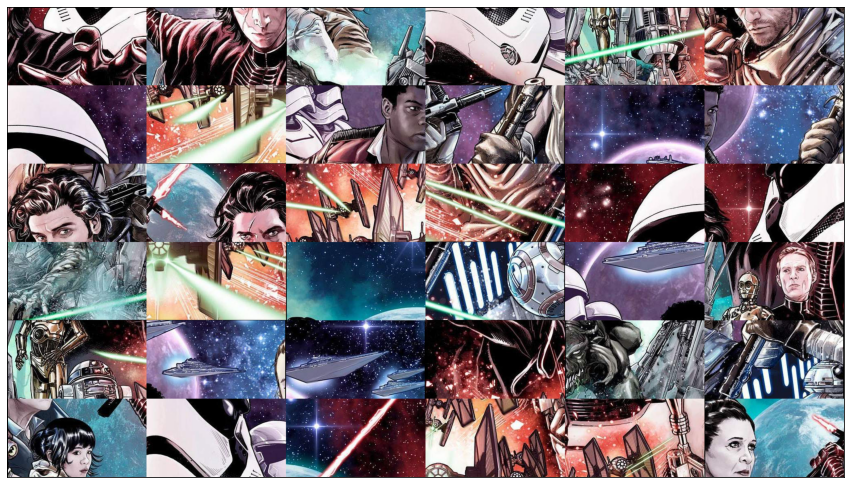

In [8]:
plot_image(images[2])

In [ ]:
(images[0].shape[1]/100, images[0].shape[0]/100)

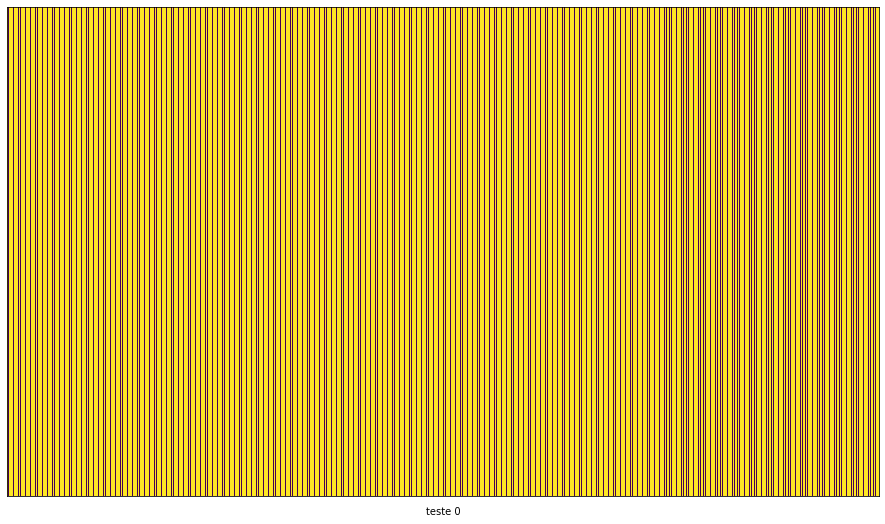

In [10]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


fig, ax = plt.subplots(figsize=(16, 9))

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


ax.set_xlabel('teste {}'.format(0))


im = ax.imshow(np.empty([images[0].shape[0], images[0].shape[1]], dtype=np.uint8), interpolation='none')




def animate(i):
    ax.set_xlabel('teste {}'.format(i), fontsize=24)
    im.set_array(images[i])
    return [im]

In [13]:
anim = animation.FuncAnimation(fig, animate, frames=10, interval=1000, blit=True)

In [12]:
HTML(anim.to_html5_video())

In [ ]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
from config import Config

experiments = []
experiments.append(Config(pop_size=100, mutation_rate=10, max_iterations=10, fitness='relative', selection='roulette', mutation='mutation1', replace='elitism', crossover='crossover3', report_time=3, puzzle_image='imgs/star-wars.jpg', puzzle_vertical_size=6, puzzle_horizontal_size=6))
experiments.append(Config(pop_size=100, mutation_rate=10, max_iterations=10, fitness='relative', selection='roulette', mutation='mutation1', replace='steady_state', crossover='crossover3', report_time=3, puzzle_image='imgs/star-wars.jpg', puzzle_vertical_size=6, puzzle_horizontal_size=6))
experiments.append(Config(pop_size=100, mutation_rate=10, max_iterations=10, fitness='relative', selection='roulette', mutation='mutation1', replace='elitism', crossover='crossover3', report_time=3, puzzle_image='imgs/triforce.png', puzzle_vertical_size=4, puzzle_horizontal_size=5))
#experiments.append(Config(pop_size=100, mutation_rate=10, max_iterations=10, fitness='relative', selection='tournament', mutation='mutation1', replace='elitism', crossover='crossover1', report_time=3, puzzle_image='imgs/triforce.png', puzzle_vertical_size=4, puzzle_horizontal_size=5))

# Executando experimentos

In [ ]:
for exp in experiments:
    puzzle = Puzzle(exp.puzzle_image, exp.puzzle_vertical_size, exp.puzzle_horizontal_size)
    exp_genetic_algorithm(puzzle, exp.pop_size, max_iterations=exp.max_iterations, crossover=exp.crossover, report_time=exp.report_time)
    

# Testes Gerais

In [ ]:
puzzle = Puzzle('imgs/star-wars.jpg', 6, 6)
#puzzle = Puzzle('imgs/triforce.png', 3, 4)

ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())
plot_image(ps1.get_image_grid(), figsize=(7, 7))

print(puzzle.get_avg_rand_iterations())
exp_genetic_algorithm(puzzle, 1000, max_iterations=1000, crossover='crossover2', mutation='mutation2', report_time=np.inf)


In [ ]:
puzzle = Puzzle('imgs/triforce.png', 3, 4)
print(puzzle.get_avg_rand_iterations())
exp_genetic_algorithm(puzzle, 1000, max_iterations=1000, crossover='crossover3')

In [ ]:
puzzle = Puzzle('imgs/triforce.png', 5, 5)
exp_genetic_algorithm(puzzle, 1000, max_iterations=1000, crossover='crossover3', fitness='relative')

In [ ]:
puzzle = Puzzle('imgs/triforce.png', 3, 4)
ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())
ps2 = ProposedSolution(puzzle.gen_shuffle_pieces())

plot_image(puzzle.get_image_grid(), puzzle.get_image(), figsize=(7, 7))
plot_image(ps1.get_image_grid(), ps1.get_image(), figsize=(7, 7))
plot_image(ps2.get_image_grid(), ps2.get_image(), figsize=(7, 7))

print("ps1 fitness absolute = {}, fitness relative = {}".format(ps1.fitness_absolute(), ps1.fitness_relative()))
print("ps2 fitness absolute = {}, fitness relative = {}".format(ps2.fitness_absolute(), ps2.fitness_relative()))


In [ ]:
puzzle = Puzzle('imgs/star-wars.jpg', 10, 10)
ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())
ps2 = ProposedSolution(puzzle.gen_shuffle_pieces())

plot_image(puzzle.get_image_grid(), puzzle.get_image(), figsize=(20, 10))
plot_image(ps1.get_image_grid(), ps1.get_image(), figsize=(20, 10))
plot_image(ps2.get_image_grid(), ps2.get_image(), figsize=(20, 10))

print("ps1 fitness absolute = {}, fitness relative = {}".format(ps1.fitness_absolute(), ps1.fitness_relative()))
print("ps2 fitness absolute = {}, fitness relative = {}".format(ps2.fitness_absolute(), ps2.fitness_relative()))
print("numero de diferentes combinações para resolver o problema = {}".format(puzzle.get_avg_rand_iterations()))


In [ ]:
puzzle = Puzzle('imgs/star-wars.jpg', 8, 8)
ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())

plot_image(puzzle.get_image_grid(), figsize=(7, 7))
plot_image(ps1.get_image_grid(), figsize=(7, 7))
mutation1(ps1)
plot_image(ps1.get_image_grid(), figsize=(7, 7))

In [ ]:
puzzle = Puzzle('imgs/triforce.png', 3, 4)
ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())

plot_image(puzzle.get_image_grid(), figsize=(7, 7))
plot_image(ps1.get_image_grid(), figsize=(7, 7))
mutation2(ps1)
plot_image(ps1.get_image_grid(), figsize=(7, 7))

In [ ]:
puzzle = Puzzle('imgs/triforce.png', 3, 3)
plot_image(puzzle.get_image_grid(), figsize=(4, 4))

ps1 = ProposedSolution(puzzle.gen_shuffle_pieces())
ps2 = ProposedSolution(puzzle.gen_shuffle_pieces())

plot_image(ps1.get_image_grid(), figsize=(4, 4))
plot_image(ps2.get_image_grid(), figsize=(4, 4))

child = crossover2(ps1, ps2)
plot_image(child.get_image_grid(), figsize=(4, 4))

# Bibliografia
1. RUSSEL, S.; NORVIG, P. Artificial Intelligence:  a modern approach.  Prentice Hall.  3rd edition, 2010.


# Divisão das tarefas

|           | Mapas  | DFS  | BFS  | Best-First  | Hill-Climbing | A* | Análise por gráficos   | Relatório |
|-----------|--------|------|------|-------------|---------------|----|------------------------|-----------|
| Anderson  |   X    |  X   |  X   |             |               | X  |                        |     X     |
| Diego     |        |      |      |      X      |               |    |                        |     X     |
| Guilherme |        |      |      |             |               | X  |                        |     X     |
| Heitor    |   X    |      |      |             |      X        |    |                        |     X     |
| Yuri      |        |      |      |             |               |    |        X               |     X     |